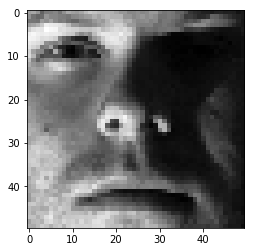

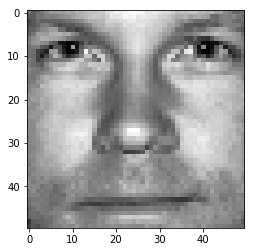

In [1]:
# part b
import os
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
os.chdir('/Users/Ruihao/Desktop/course/Applied_Machine_Learning/HW2')
#train_feature stores pixel values of all training pictures (540 * 2500)
# train_label contains which class does this training sample corresponding to (540) 

# part b
train_label, train_feature = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_feature.append(im.reshape(2500,))
    train_label.append(line.strip().split()[1])
# convert list to array
train_feature = np.array(train_feature, dtype = float)
train_label = np.array(train_label, dtype = int)

#print len(train_feature[0])
test_label, test_feature = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_feature.append(im.reshape(2500,))
    test_label.append(line.strip().split()[1])
test_feature = np.array(test_feature, dtype=float)
test_label = np.array(test_label, dtype=int)
# print faces (one from train, one from test)
plt.imshow(train_feature[24,:].reshape(50,50), cmap = cm.Greys_r)
plt.show()
plt.imshow(test_feature[24,:].reshape(50,50), cmap = cm.Greys_r)
plt.show()

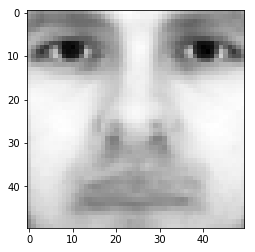

In [2]:
# part c
# computer average face from whole training set
# compute average for each column by setting up axis = 0
col_mean = np.mean(train_feature, axis=0)
plt.imshow(col_mean.reshape(50,50), cmap = cm.Greys_r)
plt.show()

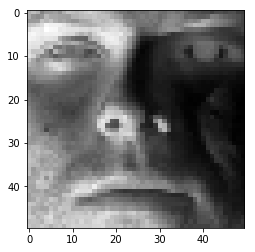

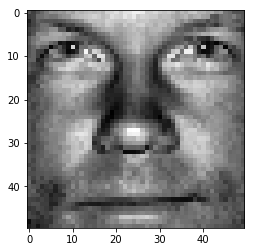

In [3]:
# part d
# mean subtraction for train image
#aver_train_feature = train_feature - np.tile(col_mean, (540, 1))
aver_train_feature = train_feature - col_mean
plt.imshow(aver_train_feature[24,:].reshape(50,50), cmap = cm.Greys_r)
plt.show()
# mean subtraction for test image
aver_test_feature = test_feature - np.tile(col_mean, (100,1))
plt.imshow(aver_test_feature[24,:].reshape(50,50), cmap = cm.Greys_r)
plt.show()

Populating the interactive namespace from numpy and matplotlib


/Users/Ruihao/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


((540, 540), (540,), (2500, 2500))


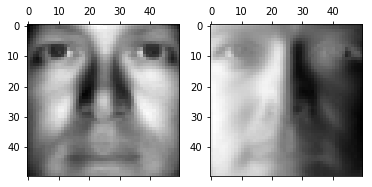

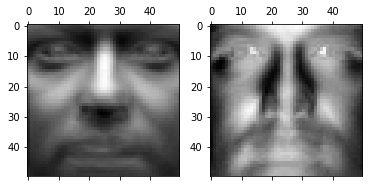

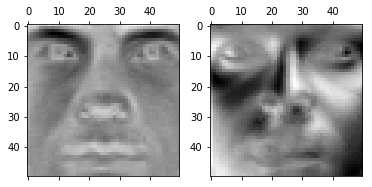

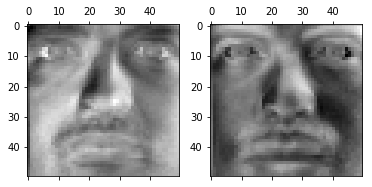

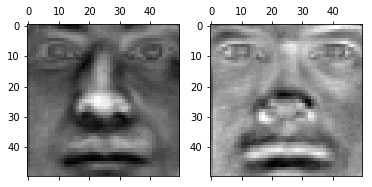

In [4]:
# part e
# Eigenface
%pylab inline
U, S, V = np.linalg.svd(aver_train_feature, full_matrices=True)
# each row of V has same dimension 2500 as the face image
print(U.shape, S.shape, V.shape)
plt.figure(figsize=(50,50))
fig, (ax1,ax2) = subplots(1,2)
ax1.matshow(V[0].reshape(50,50), cmap='gray')
ax2.matshow(V[1].reshape(50,50), cmap='gray')
fig, (ax1,ax2) = subplots(1,2)
ax1.matshow(V[2].reshape(50,50), cmap='gray')
ax2.matshow(V[3].reshape(50,50), cmap='gray')
fig, (ax1,ax2) = subplots(1,2)
ax1.matshow(V[4].reshape(50,50), cmap='gray')
ax2.matshow(V[5].reshape(50,50), cmap='gray')
fig, (ax1,ax2) = subplots(1,2)
ax1.matshow(V[6].reshape(50,50), cmap='gray')
ax2.matshow(V[7].reshape(50,50), cmap='gray')
fig, (ax1,ax2) = subplots(1,2)
ax1.matshow(V[8].reshape(50,50), cmap='gray')
ax2.matshow(V[9].reshape(50,50), cmap='gray')

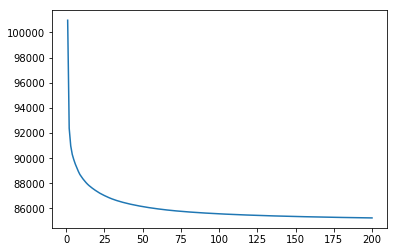

In [5]:
# part f
# low-rank Approximation
x, y = [], []
for r in range(1,201):
    #iden = np.identity(r)
    rank_r_X = np.dot(np.dot(U[:,:r],np.diag(S[:r])),V[:r,:])
    x.append(r)
    y.append(np.linalg.norm(train_feature - rank_r_X))
plt.plot(x,y)

In [16]:
# part g EigenFace Feature
from sklearn import linear_model
def r_dimension_feature_matrix(r, X, V):
    F = np.dot(X, (V[:r,:]).T)
    return F

def eigenface_train(r, train_feature):
    aver_train_feature = train_feature - np.mean(train_feature, axis = 0)
    U, S, V = np.linalg.svd(aver_train_feature, full_matrices=True)
    F_train = r_dimension_feature_matrix(r, aver_train_feature, V)
    return F_train

def eigenface_test(r, test_feature):
    aver_test_feature = test_feature - np.mean(test_feature, axis = 0)
    U, S, V = np.linalg.svd(aver_train_feature, full_matrices=True)
    F_test  = r_dimension_feature_matrix(r, aver_test_feature, V)
    return F_test

F_train = eigenface_train(10, train_feature)
print F_train.shape
print F_train
F_test = eigenface_test(10, test_feature)
print F_test.shape
print F_test

(540, 10)
[[-3071.98503336  -440.55436121  -127.39265075 ...,   178.04529608
   -119.05731126    30.29017967]
 [ 2197.05744965  -760.60052365  -562.46174352 ...,   182.9450855
    113.96838521  -384.43352369]
 [ 2473.33262159   163.06716256   608.22806399 ...,   -85.3894248
   -584.65403477  -325.92945615]
 ..., 
 [ 1841.10091761  1907.14587095  -226.44323    ...,    51.07709295
     33.22865825    26.8049682 ]
 [-2586.30249394   163.15381029  -151.68973865 ...,  -265.28513326
    144.82934451  -105.81505369]
 [ 1363.71276667  2930.60526623  1287.14464964 ...,   311.35304262
    162.68186295  -198.41107223]]
(100, 10)
[[  1.89003932e+03   3.11819979e+02   1.70246476e+03  -3.83053588e+00
    7.77681756e+01  -5.82484112e+01  -2.62523196e+02  -1.62918144e+02
   -8.24853702e+02  -1.56151742e+02]
 [  6.13851288e+02   2.04318164e+03  -7.49861164e+02   2.19423149e+02
    9.36576136e+00   1.74164836e+02  -1.68175562e+02   3.36992320e+02
    1.25998113e+02  -3.49433700e+02]
 [ -2.97850066e+03  

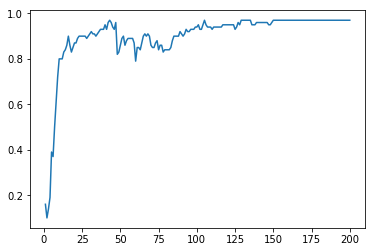

In [15]:
from sklearn import linear_model
x, y = [], []
for i in range(1, 201):
    F_train = eigenface_train(i, train_feature)
    F_test = eigenface_test(i, test_feature)
    logistic = linear_model.LogisticRegression()
    logistic.fit(F_train, train_label)
    x.append(i)
    y.append(logistic.score(F_test, test_label))
plt.plot(x,y)   